# How to Build a Machine Learning Project
Welcome to our first hands-on workshop! We will learn together how to build a Machine Learning Project from scratch. After this workshop, you will be able to:
- Understand the purpose of applying Machine Learning to a specific dataset
- **Frame the problem** as a **Classification** or **Regression** task
- **Manipulate features** of the data in order to better understand them
- Perform **Exploratory Data Analysis (EDA)** and extract meaningful insights
- **Preprocess data** to be used in Machine Learning algorithms
- Choose the **best algorithm** that maximizes a performance metric of choice
- Choose the **best hyperparameters** that maximize model performance
- **Evaluate** the **performance** of the model on **test data**
<hr>


![Bilbo on a journey](https://media.giphy.com/media/oj2GhTqAIoNIk/giphy.gif)

First, let's import the libraries that we will need for this project: <br>
- [Numpy](https://numpy.org/doc/) - for matrices and vectors manipulation and operations 
- [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html) - for data cleaning and analysis
- [Scikit-Learn](https://scikit-learn.org/stable/) - for building predictive models
- [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) - for visualizing various types of plots


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)
pd.options.mode.chained_assignment = None  # default='warn'

## **0. Understand the Problem**
The very first step is **understand the given problem** and **identify the objective** of the task. By finding the purpose of the task, we can make sure whether the problem can be framed as a Machine Learning Problem or not.<br>

---

For the sake of this workshop, the objective of the task is already defined:<br>
###"Given various socio-economic features, build a model to predict housing prices in California using the California census data.."<br>
---

## **1. Get the Data**
The first step is to download the dataset and load it into Colab runtime. We will use the California census dataset published on [Statslib]():



In [ ]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

fetch_housing_data()

Let's read the dataset into a Dataframe, a special data structure used in Pandas with various helpful functions for data analysis.

In [ ]:
data_path=os.path.join(HOUSING_PATH,'housing.csv')
df=pd.read_csv(data_path)

Let's check the dimensions of the dataframe:

In [ ]:
nb_of_data_samples,nb_of_features=df.shape
print("Number of samples:",nb_of_data_samples,"\nNumber of features:",nb_of_features)

Number of samples: 20640 
Number of features: 10


Let us take a look on the data:

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district and there are 10 attributes: 
- longitude 
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
-households
- median_income
- ocean_proximity
-**median_house_value (target feature)**<br><br>
Since we want to predict the **median house value** feature, which is a **continuous variable**, we can frame the problem as a **regression problem**.

Next, let's check some useful informations about the features count and data types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We notice that:
- There are two different data types: **float64** and **Object** data types (String data type in this case)
- total_bedrooms features has some missing values that we need to do something about later on

A very important step before examining the data is to split the data into **train and test data** to avoid **data snooping**.

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df=train_test_split(df,test_size=0.2,random_state=RANDOM_SEED)

## **2. Explore the Data** 
Next, let's try to go deeper in understanding the features of the dataset:<br>
First, let's start by getting some useful statistics about the features:

In [ ]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


To verify our observations, let's visualize these features distributions: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6a7148390>,
      dtype=object)

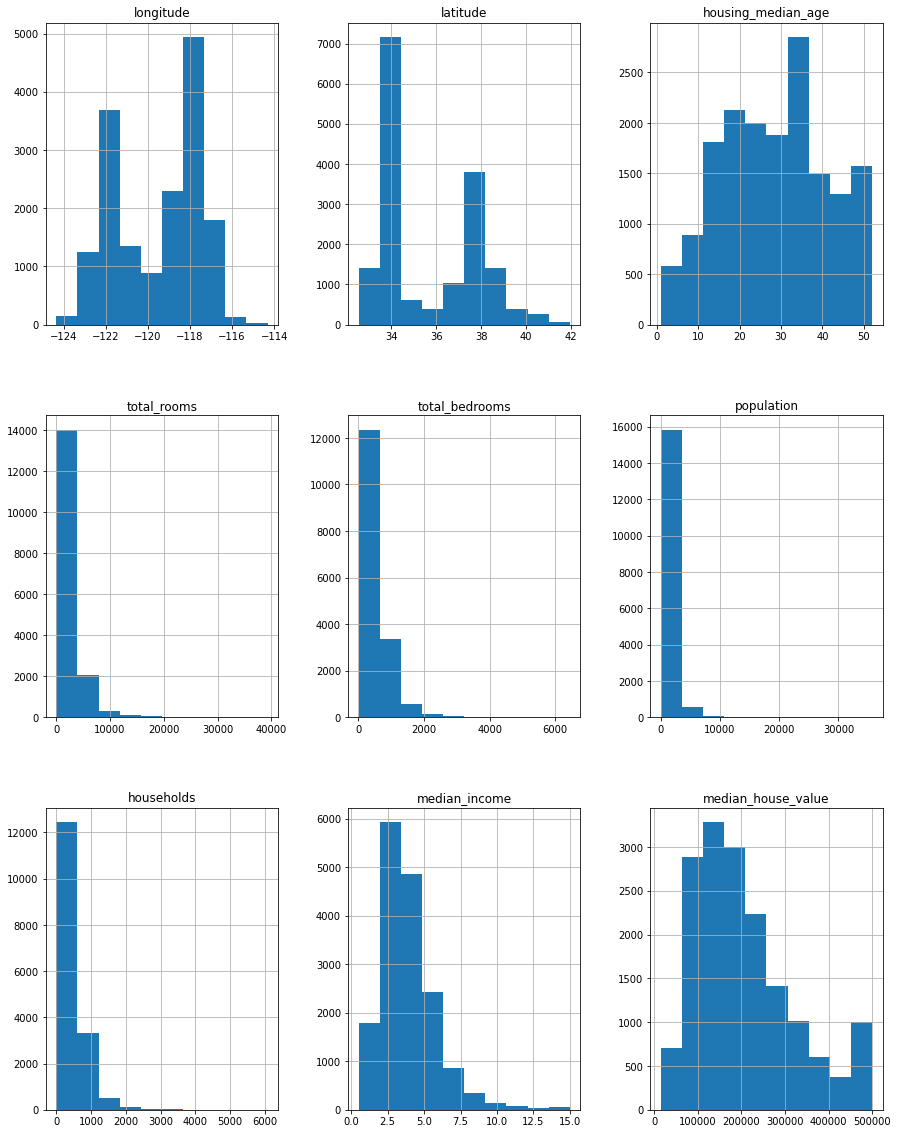

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_df.hist(ax=ax)

The vizualizations confirmed our suspicions:
- Each feature has its range which makes the learning later on quite slow, which mean that we need to rescale all features to accelerate learning.
- All of total_rooms, total_bedroom, population and household features are highly skewed to one side, which mean that there are outliers that we need to take care of.
-  The target feature distribution is similar to a gaussian distribution

Next, let's investigate the relationship between the location and median house value. <br>
Let's first plot the longtitude vs the latitude:

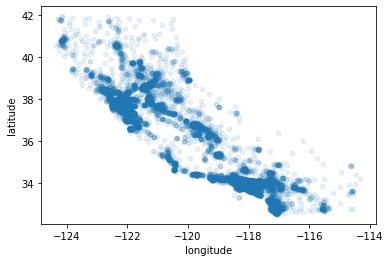

In [ ]:
train_df.plot(kind='scatter',x="longitude",y="latitude",alpha=0.1)

To make the map of california more informative for our task, let us add the median house value to the plot:

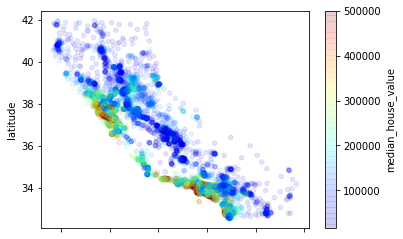

In [ ]:
train_df.plot(kind='scatter',x="longitude",y="latitude",alpha=0.1,c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True) 

We notice that the closer the districts are the ocean, the higher the value of the median house value, which highlights the importance of the longtitude and latitude features.
<br>

Let's investigate now the categorical feature "Ocean proximity":



(array([2.086e+03, 0.000e+00, 5.227e+03, 0.000e+00, 0.000e+00, 7.341e+03,
        0.000e+00, 1.854e+03, 0.000e+00, 4.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

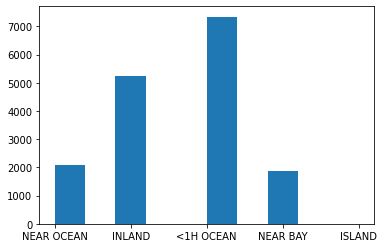

In [ ]:
plt.hist(train_df["ocean_proximity"])

We notice that there are 5 unique classes with the maximum class is <1H OCEAN and the minimum class is ISLAND.   

Next, let's invetigate the correlations between the features:

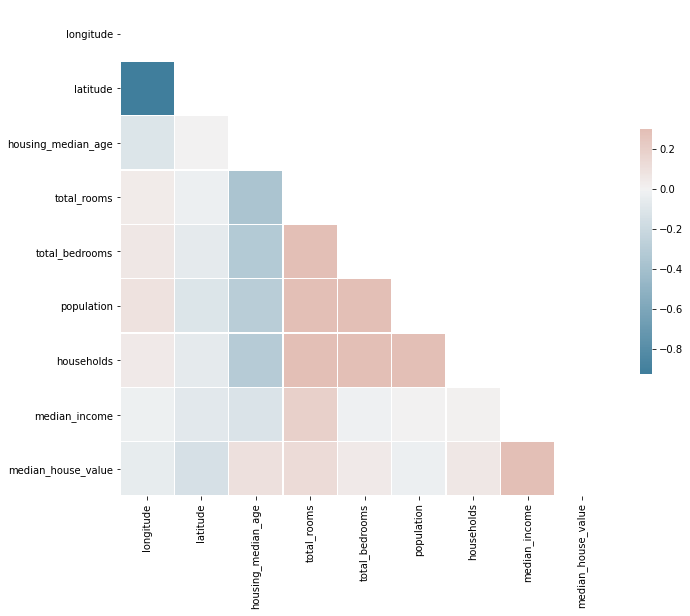

In [ ]:
corr=train_df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We notice that:
- there is a strong correlation between the target feature and the spatial location (longitude and latitude), confirming our previous observations.
- there is also a strong correlation between the target feature and median income
- note that there is a strong correlation between households and total_rooms, population and households, and total_rooms and nb_of_bedrooms. We might use these correlations to craft new features later on.

Let's find the correlation between these newly crafted features and the target value:

In [ ]:
train_df["rooms_per_household"]=train_df["total_rooms"]/train_df["households"]
train_df["bedrooms_per_total"]=train_df["total_bedrooms"]/train_df["total_rooms"]
train_df["households_per_population"]=train_df["households"]/train_df["population"]

In [ ]:
corr=train_df.corr()
corr["median_house_value"].sort_values()

bedrooms_per_total          -0.257419
latitude                    -0.142983
longitude                   -0.046349
population                  -0.026032
total_bedrooms               0.047980
households                   0.063714
housing_median_age           0.103706
total_rooms                  0.133989
rooms_per_household          0.158485
households_per_population    0.263072
median_income                0.690647
median_house_value           1.000000
Name: median_house_value, dtype: float64

Neat! We notice that bedrooms_per_total, rooms_per_household, and households_per_population have higher correlation with the target attribute than the original features. This means that these features would be a great addition to our training features.
<br>
Let's remove them for the moment from the training features:

In [ ]:
train_df=train_df.drop(["rooms_per_household","bedrooms_per_total","households_per_population"],axis=1)

## **3. Prepare the Data**

After analyzing the data, let's recap the steps we need to do:
- Fill the missing values in the total_bedrooms feature
- Encode the Ocean Proximity feature into an integer value
- Standardize all the numerical features 

In [ ]:
y_train_df=train_df["median_house_value"].copy()
x_train_df=train_df.drop("median_house_value",axis=1)

### Dealing with Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="median")
train_df_num=x_train_df.drop("ocean_proximity",axis=1)
impute.fit(train_df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

Let's make sure the imputer has really fitted the data:

In [ ]:
impute.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [ ]:
train_df_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2129.0000
total_bedrooms         437.0000
population            1167.0000
households             410.0000
median_income            3.5458
dtype: float64

Both median values match! Let's fill the missing values now:

In [ ]:
impute.transform(train_df_num)

array([[-1.1703e+02,  3.2710e+01,  3.3000e+01, ...,  2.3000e+03,
         6.2300e+02,  3.2596e+00],
       [-1.1816e+02,  3.3770e+01,  4.9000e+01, ...,  1.3140e+03,
         7.5600e+02,  3.8125e+00],
       [-1.2048e+02,  3.4660e+01,  4.0000e+00, ...,  9.1500e+02,
         3.3600e+02,  4.1563e+00],
       ...,
       [-1.1838e+02,  3.4030e+01,  3.6000e+01, ...,  1.7560e+03,
         5.2700e+02,  2.9344e+00],
       [-1.2196e+02,  3.7580e+01,  1.5000e+01, ...,  1.7770e+03,
         5.5900e+02,  5.7192e+00],
       [-1.2242e+02,  3.7770e+01,  5.2000e+01, ...,  2.6190e+03,
         1.2420e+03,  2.5755e+00]])

In [ ]:
train_df_num.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

Great, we made sure all missing values are filled. <br>
### Dealing with Categorical values
Next, let's transform the "Ocean proximit" feature into a numerical feature:

In [ ]:
train_cat_df=train_df["ocean_proximity"].copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe.fit(train_cat_df.values.reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
train_cat_ohe=ohe.transform(train_cat_df.values.reshape(-1,1))
train_cat_ohe

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Scaling features
As we discusssed before, let's standardize all numerical features:

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
train_df_num_scaled=std_scaler.fit_transform(train_df_num)

### Creating the Pipeline

Now that we did all the previous tasks, let's prepare the pipeline for our model:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self): 
    pass
  def fit(self, X, y=None):
    return self # nothing else to do
  
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]

attrib_adder = CombinedAttributesAdder()
train_extra_attribs = attrib_adder.transform(x_train_df.values)

In [ ]:
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),
                        ("extra_attribs",CombinedAttributesAdder()),
                      ("std_scaler",StandardScaler()),
                      ])

In [ ]:
from sklearn.compose import ColumnTransformer
num_attributes=train_df_num.columns
cat_attributes=["ocean_proximity"]

full_pipeline=ColumnTransformer([
                                 ("num",num_pipeline,num_attributes),
                                 ("cat",OneHotEncoder(),cat_attributes),
                              ])

Now, we can preprocess the original dataset:

In [ ]:
x_train_prepared=full_pipeline.fit_transform(x_train_df)
y_train=y_train_df.values

## **5. Short-List Promising Models**
Now that we have prepared our data, it is time to train the machine learning models!


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(x_train_prepared,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's evaluate some of the predictions:

In [ ]:
labels=y_train[:5]
sampled=x_train_prepared[:5,:]
print("Labels:",labels)

Labels: [103000. 382100. 172600.  93400.  96500.]


In [ ]:
pred_labels=lin_model.predict(sampled)
print("Predicted labels:",pred_labels)

Predicted labels: [173570.37219125 312853.84913207 245175.83390789 126077.83127241
 177364.78444094]


Not bad at all! However the predictedvalues are not very close to the actual values. We need some kind of performance metric to measure how close we are to the actual values.<br>
One useful metric in regression is the Root Mean Square Error (RMSE):

In [ ]:
from sklearn.metrics import mean_squared_error
pred_labels=lin_model.predict(x_train_prepared)
mse=mean_squared_error(y_train,pred_labels)
print("RMSE:",np.sqrt(mse))

RMSE: 65122.60742387979


Okay this score is not that good! With this simple model, we can infer that the model is underfitting. Let's try a more powerful model like Decision Trees:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr_model=DecisionTreeRegressor()
dtr_model.fit(x_train_prepared,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import mean_squared_error
pred_labels=dtr_model.predict(x_train_prepared)
mse=mean_squared_error(y_train,pred_labels)
print("RMSE:",np.sqrt(mse))

RMSE: 0.0


Clearly there is a problem, is this model perfect? Let's us double check with a more robust evaluation technique: cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dtr_model,x_train_prepared,y_train,cv=5,scoring="neg_mean_squared_error")
scores=np.sqrt(-scores)

In [ ]:
print("mean rmse:",np.mean(scores))
print("std:",np.std(scores))

mean rmse: 71711.40468708196
std: 360.58058123865163


Now we know that this model is a bit worse than the linear model, there is a possibility that the model is overfitting the data. Let's us now a better model like Random Forests. Usually such models called Ensemble models perform better than simpler models:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_model=RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rand_model,x_train_prepared,y_train,cv=5,scoring="neg_mean_squared_error")
scores=np.sqrt(-scores)

In [ ]:
print("mean rmse:",np.mean(scores))
print("std:",np.std(scores))

mean rmse: 50447.002014296806
std: 702.8995519311321


Wow! The model has improved drastically!

## **6. Fine Tune the System and Test**

Usually after this step follows the hyperparameters tuning stage, where we try tuning our model hyperparameters to achieve higher results.
For more information, check the [GridSearch](https://scikit-learn.org/stable/modules/grid_search.html) approach in Scikit Learn.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(x_train_prepared,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

63918.901644252466 {'max_features': 2, 'n_estimators': 3}
54908.8842296428 {'max_features': 2, 'n_estimators': 10}
52380.94986533491 {'max_features': 2, 'n_estimators': 30}
60287.37626457158 {'max_features': 4, 'n_estimators': 3}
52222.680521939415 {'max_features': 4, 'n_estimators': 10}
50314.48078341828 {'max_features': 4, 'n_estimators': 30}
59228.84272516006 {'max_features': 6, 'n_estimators': 3}
52552.10695459695 {'max_features': 6, 'n_estimators': 10}
49858.80958316217 {'max_features': 6, 'n_estimators': 30}
58300.88145292794 {'max_features': 8, 'n_estimators': 3}
52146.59552365994 {'max_features': 8, 'n_estimators': 10}
50197.55307102659 {'max_features': 8, 'n_estimators': 30}
61683.92880007305 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53989.66851768767 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59283.17037625248 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51721.05592777798 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Now it is time to test our model! We have seen previously that Random Forests perform the best in comparison to the previous models, so we will use it for our test data evaluation. 

In [ ]:
final_model=grid_search.best_estimator_

X_test = test_df.drop("median_house_value", axis=1)
y_test = test_df["median_house_value"].copy()
X_test_prepared = full_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [ ]:
print("final rmse:",final_rmse)

final rmse: 67471.61003282058
